In [20]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error
import math

# sickit-learn

## Fitting and predicting: estimator basics

In [21]:
#импортируем случайный лес,строит несколько деревьев
#Classifier пишем,когда решаем задачу классификации,набор не является непрервыной величиной и 
#Regressor если величина прерывная

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
# random_state=0 писать можно любое число,нам нужен random_state для инициализации,и главное по пути работы не менять его.
# передаем список из двух списков
X = [[ 1,  2,  3],  # 2 samples, 3 features
     [11, 12, 13]]
#для двух примеров 2 метки
y = [0, 1]  # classes of each sample
clf.fit(X, y)


RandomForestClassifier(random_state=0)

In [22]:
# получение прогнозов
clf.predict(X)  # predict classes of the training data


array([0, 1])

In [23]:
#если одномерный массив оборачиаем в двое скобок
#если список оборачиваем в скобочки clf.predict([X])
#если X был массив,то тогда X = np.array([15,20,3]) ->  X =  X.reshape(1,-1) -> clf.predict(X)
clf.predict([[4, 5, 6], [14, 15, 16]])  # predict classes of new data

array([0, 1])

## Transformers and pre-processors

In [24]:
from sklearn.preprocessing import StandardScaler
X = [[0, 15],
     [1, -10]]
# scale data according to computed scaling values
# считает среднее значение по каждому столбцу матрицы,вычитает среднее значение и все делит на стандартное отклонение.
st_scaler = StandardScaler()
st_scaler.fit(X)


StandardScaler()

In [27]:
st_scaler.transform([[0.5, 6]])
Xs = st_scaler.fit_transform(X)
Xs

array([[-1.,  1.],
       [ 1., -1.]])

## Pipelines: chaining pre-processors and estimators    

In [29]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# create a pipeline object
#объединение несколько преобразований над данными в один объект и выполнение
# МЫ ПОЛУЧИЛИ ТОЧНОСТЬ ПРОГНОЗА НА ТЕСТОВОМ МНОЖЕСТВЕ
pipe = make_pipeline(
     StandardScaler(),
     LogisticRegression())



In [30]:
# load the iris dataset and split it into train and test sets
# СРАЗУ ВОЗВРАЩАЕТ X, y :return_X_y=True?,ИНАЧЕ ВЕРНЕТ СЛОВАРЬ..
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# fit the whole pipeline
pipe.fit(X_train, y_train)

# we can now use it like any other estimator
accuracy_score(pipe.predict(X_test), y_test)


0.9736842105263158

## Model evaluation

In [31]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

X, y = make_regression(n_samples=1000, random_state=0)
lr = LinearRegression()

#result = cross_validate(lr, X, y)  # defaults to 5-fold CV
#result  # r_squared score is high because dataset is easy


In [32]:
#Передается регрессор,который еще не обучен и данные X, y
#функция разобьет наши данные на 5 независимых множеств(4 для обучения,5-е для проверки)
#и затем общие оценки нам выведутся
#смысл - помогает застраховаться и понять обучили,переубоучили ли мы модель
result = cross_validate(lr, X, y)  # defaults to 5-fold CV
result  # r_squared score is high because dataset is easy

{'fit_time': array([0.07202029, 0.00800943, 0.0080328 , 0.00796342, 0.00800753]),
 'score_time': array([0.0080018, 0.       , 0.       , 0.       , 0.       ]),
 'test_score': array([1., 1., 1., 1., 1.])}

## Automatic parameter searches

In [33]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import randint


In [34]:
# СРЕДИ ПАР ВЫБИРАЕТ ЛУЧШИЕ ПАРАМЕТРЫ
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)



In [35]:
X.shape

(20640, 8)

In [36]:
#ЗАДАЕМ 5 ПАРАМЕТРОВ 
# define the parameter space that will be searched over
param_distributions = {'n_estimators': randint(1, 5),
                        'max_depth': randint(5, 10)}


In [38]:
# now create a searchCV object and fit it to the data
search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),
                             n_iter=5,
                             param_distributions=param_distributions,
                             random_state=0)

search.fit(X_train, y_train)
search.best_params_

{'max_depth': 9, 'n_estimators': 4}

In [40]:
# the search object now acts like a normal random forest estimator
# with max_depth=9 and n_estimators=4
search.score(X_test, y_test)

0.735363411343253

# Деревья решений

### Классификация 

In [43]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [44]:
from sklearn.tree import export_graphviz

In [45]:
export_graphviz (tree_clf, out_file = 'iris_tree.dot', 
                 feature_names = iris.feature_names[2:], 
                 class_names = iris.target_names,
                 rounded = True,
                 filled = True)

In [46]:
!dot -Tpng iris_tree.dot -o iris_tree.png

In [47]:
# Оценка вероятностей
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

### Регрессия

In [48]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [49]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [50]:
export_graphviz (tree_reg, out_file = 'Reg_tree.dot',
                 rounded = True,
                 filled = True)

In [51]:
!dot -Tpng Reg_tree.dot -o Reg_tree.png

## Отбор признаков

In [69]:
from sklearn.feature_selection import SelectKBest,chi2
#специальные методики,оценивают, какие признаки хорошо влияют на зависимые переменные,какие плохо и т.д.(хи квадрат используем)
#нужно передать количество признаков,которое мы хотим отобрать и критерий по которому будем отбирать(наш хи-квадрат)

In [70]:
df = pd.read_csv('churn-bigml-80.csv')
test_df = pd.read_csv('churn-bigml-20.csv')

In [71]:
df['International plan'] = df['International plan'].map({'No':0, 'Yes':1})
df['Voice mail plan'] = df['Voice mail plan'].map({'No':0, 'Yes':1})
X = df.drop(['State', 'Churn'], axis = 1)
Y = df['Churn']

test_df['International plan'] = test_df['International plan'].map({'No':0, 'Yes':1})
test_df['Voice mail plan'] = test_df['Voice mail plan'].map({'No':0, 'Yes':1})
X_test = test_df.drop(['State', 'Churn'], axis = 1)
Y_test = test_df['Churn']



### Отбор с помошью chi функции

In [72]:
#k - количество признаков
Selector = SelectKBest(chi2, k=9)
Selector.fit(X, Y)

SelectKBest(k=9, score_func=<function chi2 at 0x000001E02D85A0D0>)

In [73]:
#покажет признаки,которые он выбирает,что подходит нам и что нет,проверит степень влияния
Selector.get_support()

array([False, False,  True,  True,  True,  True, False,  True,  True,
       False, False,  True, False, False, False,  True, False,  True])

In [74]:
X.columns[Selector.get_support()].tolist()

['International plan',
 'Voice mail plan',
 'Number vmail messages',
 'Total day minutes',
 'Total day charge',
 'Total eve minutes',
 'Total night minutes',
 'Total intl calls',
 'Customer service calls']

In [75]:
drop_cols = X.columns[~Selector.get_support()].tolist()

In [76]:
drop_cols

['Account length',
 'Area code',
 'Total day calls',
 'Total eve calls',
 'Total eve charge',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl charge']

In [77]:
X_train = X.drop(drop_cols, axis = 1)

In [81]:
X_test

,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day charge,Total eve minutes,Total night minutes,Total intl calls,Customer service calls
0,0,0,0,184.5,31.37,351.6,215.8,4,1
1,0,0,0,129.1,21.95,228.5,208.8,6,4
2,0,0,0,332.9,56.59,317.8,160.6,9,4
3,0,0,0,110.4,18.77,137.3,189.6,6,2
4,0,0,0,119.3,20.28,215.1,178.7,1,1
...,...,...,...,...,...,...,...,...,...
662,0,1,26,137.1,23.31,155.7,247.6,7,2
663,0,1,29,83.6,14.21,203.9,229.5,3,1
664,0,0,0,193.9,32.96,85.0,210.1,8,3
665,0,0,0,169.8,28.87,197.7,193.7,4,1


In [78]:
X_test = X_test.drop(drop_cols, axis = 1)

In [82]:
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier

In [83]:
Ada_clf = AdaBoostClassifier(base_estimator = tree.DecisionTreeClassifier(max_depth = 2))

In [84]:
Ada_clf.fit(X_train,Y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2))

In [93]:
Ada_clf.score(X_test,Y_test), Ada_clf.score(X_train,Y)

(0.9205397301349325, 0.959489872468117)

In [94]:
pred = Ada_clf.predict(X_test)

In [97]:
precision_score(Y_test,pred), recall_score(Y_test,pred)

TypeError: 'tuple' object is not callable

In [159]:
X.columns[Selector.get_support()].tolist()

['International plan',
 'Voice mail plan',
 'Number vmail messages',
 'Total day minutes',
 'Total day charge',
 'Total eve minutes',
 'Total night minutes',
 'Total intl calls',
 'Customer service calls']

### Отбор случайным лесом

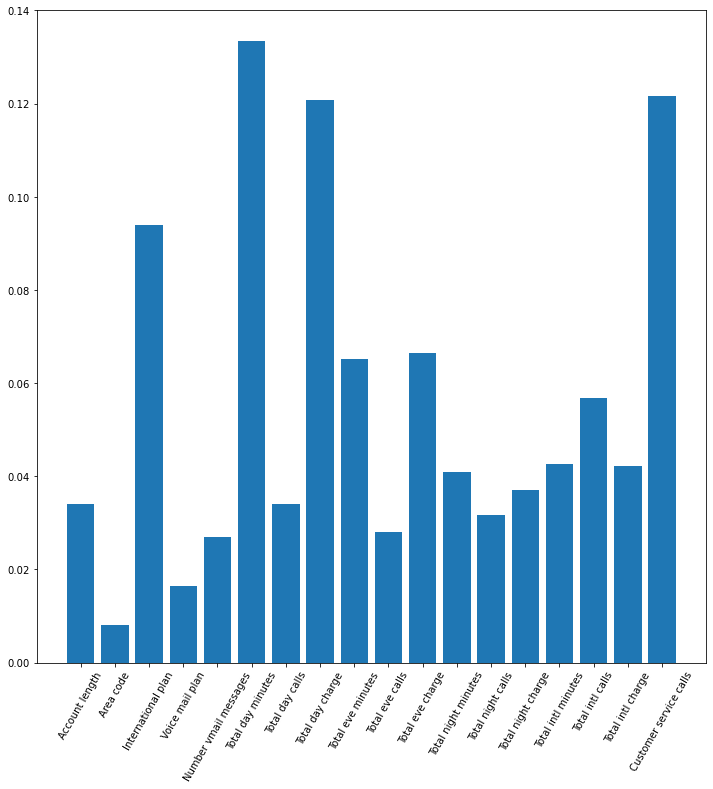

In [99]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X, Y)
clf.feature_importances_

# create a figure to plot a bar, where x axis is features, and Y indicating the importance of each feature
plt.figure(figsize=(12,12))
plt.bar(X.columns, clf.feature_importances_)
plt.xticks(rotation=60);

# Деревья решений

In [11]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target



DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

In [12]:
from sklearn.tree import export_graphviz

In [101]:
export_graphviz (tree_clf, out_file = 'iris_tree.dot', 
                 feature_names = iris.feature_names[:2], 
                 class_names = iris.target_names,
                 rounded = True,
                 filled = True)

In [102]:
!dot -Tpng iris_tree.dot -o iris_tree.png